数据标准化方案1、将数据转化为均值为0，标准差为1的集合

In [52]:
from sklearn import preprocessing
import numpy as np
x_train=np.array([[ 1., -1.,  2.],
                  [ 2.,  0.,  0.],
                  [ 0.,  1., -1.]])

In [5]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [13]:
scaler.scale_ #标准差，scale缩放

array([0.81649658, 0.81649658, 1.24721913])

In [53]:
x_scaled=scaler.transform(x_train)  #新的x_scaled的均值为0，标准差为1，可以x_scaled.mean(axis=0),x_scaled.std(axis=0)
x_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

数据标准化2、将数据转化为0-1

In [64]:
x_train=np.array([[ 1., -1.,  2.],
                  [ 2.,  0.,  0.],
                  [ 0.,  1., -1.]])

In [70]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(x_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [73]:
X_test=np.array([[-3., -5.,  8.]])
x_test_minmax=min_max_scaler.transform(X_test)
print(x_test_minmax)        #x_test_minmanx为测试集按训练集转换后的值
print(min_max_scaler.min_)  #min为测试集与训练集放在一起后的最小值

[[-1.5 -2.   3. ]]
[0.         0.5        0.33333333]


-0.16666666666666666

In [6]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1.0, 2], [1, 1], 
              [1.1, 2], [1, 1.5], 
              [0.9, 2], [1, 1.2], 
              [0.3, 2], [1, 1.3], 
              [0.5, 2], [1, 1.4], 
              [0.55, 2], [1, 1.32], 
              [0.6, 2], [1, 1.28], 
              [0.45, 2], [1, 1.34], 
              [0.38, 2], [1, 1.3], 
              [0.1, 2], [1, 0.9], 
              [0.24, 0.35], [10, 9]])
#标签与center不一致，是random_state参数设置有关，设置为零导致提前终止计算
kmeans=KMeans(n_clusters=2,random_state=0).fit(X )  
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[[ 0.76761905  1.56619048]
 [10.          9.        ]]


In [3]:
X = np.array([[0, 2], [0, 4], 
              [10, 2], [10, 4]])
kmeans=KMeans(n_clusters=2,random_state=0).fit(X )
kmeans.score(X)

-4.0

In [50]:
kmeans.cluster_centers_

array([[ 0.,  3.],
       [10.,  3.]])

Automatically created module for IPython interactive environment


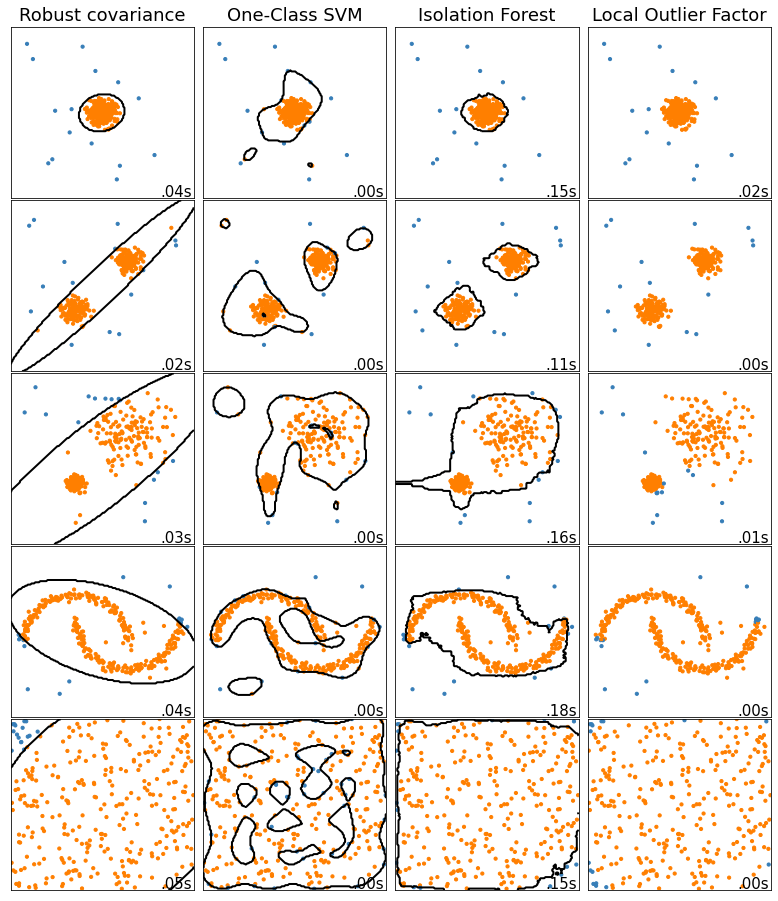

In [67]:
import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

print(__doc__)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# Example settings
n_samples = 300
outliers_fraction = 0.05
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.2)),
    ("Isolation Forest", IsolationForest(contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=35, contamination=outliers_fraction))]

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
               **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),
                     np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6,
                       size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

        colors = np.array(['#377eb8', '#ff7f00'])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

In [57]:
t=algorithm.fit(X)

In [66]:
t.score_samples

AttributeError: score_samples is not available when novelty=False. The scores of the training samples are always available through the negative_outlier_factor_ attribute. Use novelty=True if you want to use LOF for novelty detection and compute score_samples for new unseen data.

In [68]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [49]:
z

array([[ 0,  1,  4,  9, 16],
       [ 1,  2,  5, 10, 17],
       [ 4,  5,  8, 13, 20],
       [ 9, 10, 13, 18, 25],
       [16, 17, 20, 25, 32]], dtype=int32)

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
x=np.array([[1,1],[1,2],[2,2],[2,3]])
y=np.dot(x,np.array([[1,2],[2,3]]))+3
reg=LinearRegression(positive=True).fit(x,y)
print(reg)
print(reg.coef_)
reg.predict(np.array([[3,5]]))

True
LinearRegression(positive=True)
[1123. 1123.]


array([5062. , 5065.5])